In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import datetime, date
plt.style.use('ggplot')

In [2]:
# Loading the Transactions Data from the excel file

trans = pd.read_excel(r"F:\Data Analytics\2.RFM Analysis project\split data\Transactions.xlsx")

In [3]:
# Checking first 5 records from Transactions Data

trans.head(5)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [4]:
# Information of columns and data-types of Transactions Data.

trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

The datatype of <b>product_first_sold_date column is not in datetime format</b>. The data type of this column must be changed from int64 to datetime format.

## Total Records

In [5]:
print("Total records (rows) in the dataset : {}".format(trans.shape[0]))
print("Total columns (features) in the dataset : {}".format(trans.shape[1]))

Total records (rows) in the dataset : 20000
Total columns (features) in the dataset : 13


## Numeric Columns and Non-Numeric Columns

In [6]:
# select numeric columns
df_numeric = trans.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print("The numeric columns are :")
print(numeric_cols)


# select non-numeric columns
df_non_numeric = trans.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print("The non-numeric columns are :")
print(non_numeric_cols)

The numeric columns are :
['transaction_id' 'product_id' 'customer_id' 'online_order' 'list_price'
 'standard_cost' 'product_first_sold_date']
The non-numeric columns are :
['transaction_date' 'order_status' 'brand' 'product_line' 'product_class'
 'product_size']


## 1. Missing Values Check

Checking for the presence of any missing values in the dataset. If missing values are present for a particular feature then depending upon the situation the feature may be either dropped (cases when a major amount of data is missing) or an appropiate value will be imputed in the feature column with missing values.

In [7]:
# Total number of missing values

trans.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [8]:
# Percentage of missing values

trans.isnull().mean()*100

transaction_id             0.000
product_id                 0.000
customer_id                0.000
transaction_date           0.000
online_order               1.800
order_status               0.000
brand                      0.985
product_line               0.985
product_class              0.985
product_size               0.985
list_price                 0.000
standard_cost              0.985
product_first_sold_date    0.985
dtype: float64

Here it is observed that columns like <b>online_order, brand, product_line, product_class , product_size, standard_cost, product_first_sold_date</b> have missing values.

### 1.1 Online Order

<b>Since 1.8 % of the records have online_order data missing we can perform mode imputation for this categorical column.</b>

In [9]:
trans[trans['online_order'].isnull()]

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
97,98,49,333,2017-06-23,NaN,Approved,Trek Bicycles,Road,medium,medium,533.51,400.13,37823.0
166,167,90,3177,2017-04-26,NaN,Approved,Norco Bicycles,Standard,low,medium,363.01,290.41,38482.0
169,170,6,404,2017-10-16,NaN,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,37838.0
250,251,63,1967,2017-04-11,NaN,Approved,Solex,Standard,medium,medium,1483.20,99.59,42145.0
300,301,78,2530,2017-03-24,NaN,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,35455.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19514,19515,51,690,2017-01-22,NaN,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0
19573,19574,18,1735,2017-01-15,NaN,Approved,Solex,Standard,medium,medium,575.27,431.45,41345.0
19580,19581,49,1933,2017-10-12,NaN,Approved,Trek Bicycles,Road,medium,medium,533.51,400.13,41064.0
19635,19636,98,1389,2017-07-26,NaN,Approved,Trek Bicycles,Standard,high,medium,358.39,215.03,38002.0


In [10]:
most_freq_online_mode = trans['online_order'].mode()
most_freq_online_mode

0    1.0
Name: online_order, dtype: float64

<b>Since 1 is the most frequent value of online order. We will do a mode imputation on this categorical value.</b>

In [11]:
trans['online_order'].fillna(1, inplace=True)

In [12]:
trans['online_order'].isnull().sum()

0

Currently there are no missing values for online_order column

## 1.2 Brand, Product Line, Product Class, Product Size, Standard Cost, Product First Sold Date

It is observed that when brand is null then all other column values with missing values viz. 'product_line', 'product_class', 'product_size', 'standard_cost', 'product_first_sold_date' are also null. <b>Also this null values comprise 1 % of the dataset. Hence we can drop these records/rows.</b>

In [13]:
trans[trans['brand'].isnull()][['brand', 'product_line', 'product_class', 'product_size', 
                                'standard_cost', 'product_first_sold_date']].drop_duplicates()

,brand,product_line,product_class,product_size,standard_cost,product_first_sold_date
136,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
trans[trans['brand'].isnull()][['brand', 'product_line', 'product_class', 'product_size', 
                                'standard_cost', 'product_first_sold_date']].shape[0]

197

In [15]:
records_to_drop = trans[trans['brand'].isnull()][['brand', 'product_line', 'product_class', 'product_size', 
                                'standard_cost', 'product_first_sold_date']].index
records_to_drop

Index([  136,   159,   366,   406,   676,   780,  1003,  1130,  1196,  1282,
       ...
       19045, 19132, 19176, 19196, 19205, 19340, 19383, 19793, 19859, 19871],
      dtype='int64', length=197)

In [16]:
trans.drop(index=records_to_drop, axis=0, inplace=True)

<b> Finally there are no Missing values in the transaction dataset.</b>

In [17]:
trans.isnull().sum()

transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
dtype: int64

In [18]:
print("Total records after removing Missing Values: {}".format(trans.shape[0]))

Total records after removing Missing Values: 19803


## 2. Creating a new feature "Profit"

<b>The Profit column will be the difference between the list price and the standard price of a product.</b>

In [19]:
trans['Profit'] = trans['list_price']-trans['standard_cost']

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Profit', ylabel='Count'>

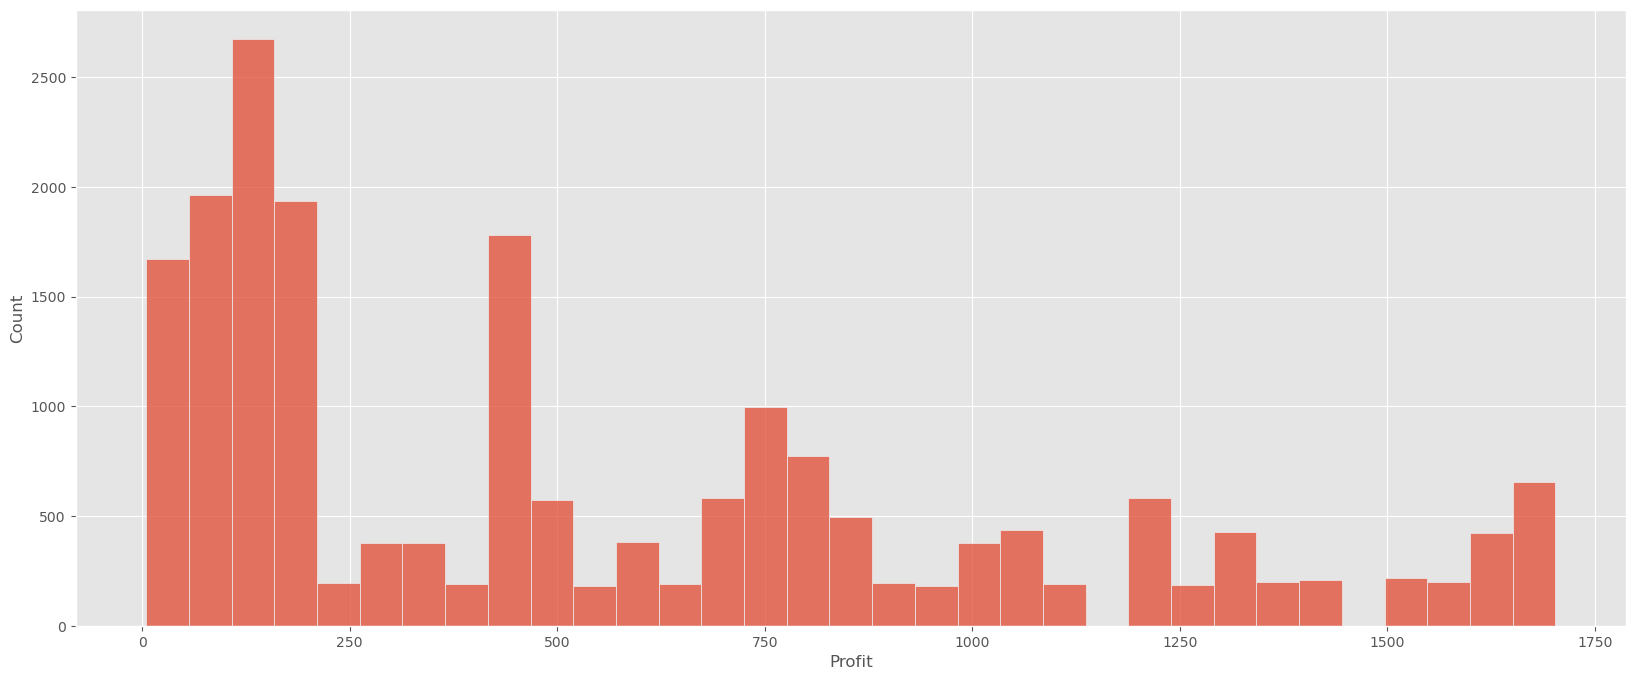

In [20]:
# Dystribution of the Profit Column

plt.figure(figsize=(20,8))
sns.histplot(trans['Profit'])

## 3. Inconsistency Check in Data

We will check whether there is inconsistent data / typo error data is present in the categorical columns.<br>
The columns to be checked are <b>'online_order', 'order_status' ,'product_line', 'product_class' , 'product_class' and 'brand'</b>

### 3.1 Online Order

There is <b>no inconsistent data</b> in <b>online_order</b> column.

In [21]:
trans['online_order'].value_counts()

online_order
1.0    10097
0.0     9706
Name: count, dtype: int64

### 3.2 Order Status

There is <b>no inconsistent data</b> in <b>order_status</b> column.

In [22]:
trans['order_status'].value_counts()

order_status
Approved     19625
Cancelled      178
Name: count, dtype: int64

In [23]:
trans[['order_status', 'online_order']].drop_duplicates()

,order_status,online_order
0,Approved,0.0
1,Approved,1.0
42,Cancelled,0.0
254,Cancelled,1.0


### 3.3 Product Line

There is <b>no inconsistent data</b> in <b>product_line</b> column.

In [24]:
trans['product_line'].value_counts()

product_line
Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: count, dtype: int64

### 3.4 Product Class

There is <b>no inconsistent data</b> in <b>product_class</b> column.

In [25]:
trans['product_class'].value_counts()

product_class
medium    13826
high       3013
low        2964
Name: count, dtype: int64

### 3.5 Product Size

There is <b>no inconsistent data</b> in <b>product_size</b> column.

In [26]:
trans['product_size'].value_counts()

product_size
medium    12990
large      3976
small      2837
Name: count, dtype: int64

### 3.6 Brand

There is <b>no inconsistent data</b> in <b>brand</b> column.

In [27]:
trans['brand'].value_counts()

brand
Solex             4253
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Norco Bicycles    2910
Name: count, dtype: int64

## 4. Duplication Checks

We need to ensure that there is no duplication of records in the dataset. This may lead to error in data analysis due to poor data quality. If there are duplicate rows of data then we need to drop such records.<br>For checking for duplicate records we need to firstly remove the primary key column of the dataset then apply drop_duplicates() function provided by Python.

In [28]:
trans_dedupped = trans.drop('transaction_id', axis=1).drop_duplicates()

print("Number of records after removing customer_id (pk), duplicates : {}".format(trans_dedupped.shape[0]))
print("Number of records in original dataset : {}".format(trans.shape[0]))

Number of records after removing customer_id (pk), duplicates : 19803
Number of records in original dataset : 19803


<b>Since both the numbers are same. There are no duplicate records in the dataset</b>

## 5. Exporting the Cleaned Transactions Data Set to csv

Currently the Transactions dataset is clean. Hence we can export the data to a csv to continue our data analysis of Customer Segments by joining it to other tables.

In [29]:
trans.to_csv('Transactions_Cleaned', index=False)